In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
data = pd.read_csv('student_scores.csv')
print(data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [7]:
'''
#one method to split the data
Training_data = data.head(20)
Testing_data = data.tail(5)
#print("Training data : {}, Testing data : {}".format(Training_data, Testing_data))

#Create Hour training label
H_train = np.array(Training_data.drop(['Scores'], 1))
print(H_train)
#Create score training label
S_train = np.array(Training_data.drop(['Hours'], 1))
print(S_train)

#Create Hour testing data
H_test = np.array(Testing_data.drop(['Scores'], 1))
print(H_test)
#Create score testing label
S_test = np.array(Testing_data.drop(['Hours'], 1))
print(S_test)
'''
#another method for spliting the data
'''
Select algorithm based on data analysis
- Split training and testing data
- we will be using Linear regression as regression problem
- Tranining data 70%
- Testing data 30%
'''
H_data = np.array(data.drop(['Scores'], 1))
S_data = np.array(data.drop(['Hours'], 1))

H_train, H_test, S_train, S_test = train_test_split( H_data, S_data, test_size = 0.3 )
print( H_train.shape, S_train.shape )
print( H_test.shape, S_test.shape )

(17, 1) (17, 1)
(8, 1) (8, 1)


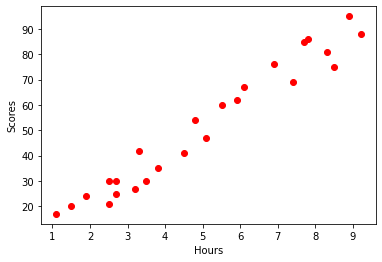

In [8]:
plt.scatter( data['Hours'], data['Scores'],color = 'red' )
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [9]:
# Apply Linear Regression
reg = LinearRegression()
model = reg.fit(H_train, S_train)

In [10]:
#get linear regression coefficients
slope = reg.coef_
intercept = reg.intercept_
print("Slope : {}, Intercept : {}".format(slope, intercept))

Slope : [[9.89411741]], Intercept : [0.56865178]


In [11]:
#Scores predicted = slope(m) * x(hours) + b(intercept)......(Training)
predicted_scores_on_training_data = np.zeros(H_train.shape)
#print(H_train)
for i in range(len(H_train)):
    predicted_scores_on_training_data[i] = (slope * H_train[i]  + intercept)
print("List : {}".format(predicted_scores_on_training_data))

List : [[11.45218093]
 [25.30394531]
 [38.16629795]
 [60.922768  ]
 [77.7427676 ]
 [91.59453197]
 [82.6898263 ]
 [32.2298275 ]
 [84.66864979]
 [15.4098279 ]
 [73.78512063]
 [88.62629675]
 [68.83806193]
 [51.02865058]
 [35.19806272]
 [27.28276879]
 [48.06041536]]


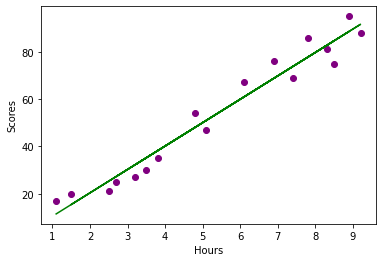

In [12]:
plt.scatter(H_train, S_train, color = 'purple')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.plot(H_train,predicted_scores_on_training_data, color = 'green')
plt.show()

    

In [13]:
#Scores predicted = slope(m) * x(hours) + b(intercept)......(Testing)
predicted_scores_on_testing_data = np.zeros(H_test.shape)
for i in range(len((H_test))):
    predicted_scores_on_testing_data[i] = (slope * H_test[i] + intercept)
print("predicted testing data : {}".format(predicted_scores_on_testing_data))



predicted testing data : [[54.98629755]
 [25.30394531]
 [76.75335586]
 [45.09218013]
 [33.21923924]
 [27.28276879]
 [19.36747486]
 [58.94394451]]


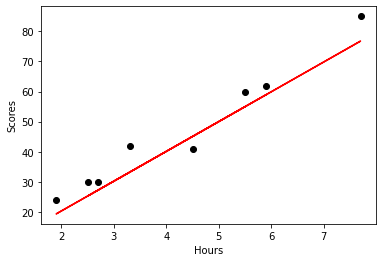

In [14]:
plt.scatter(H_test,S_test,color = 'black')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.plot(H_test,predicted_scores_on_testing_data, color = 'red')
plt.show()

In [15]:
a = reg.score(H_test,S_test)
b = reg.score(H_train,S_train)
print("Testing data : {},Training data : {}".format(a,b))


Testing data : 0.9177414443182376,Training data : 0.9568888263563209
